In [1]:
# import librarires 
import pandas as pd
# matplot lib library for visulaization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import requests
import os
# twitter library 
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
# json library
import json 
from datetime import datetime

# Gathering

In [2]:
# load first dataset 
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# use requests library to get the tsv file saved on the url 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# create the file named image predictions 
file_name = 'image_predictions'
if not os.path.exists (file_name  ):
    os.makedirs(file_name)
# write the content to the file     
with open (os.path.join(file_name,url.split('/')[-1] ), mode ='wb') as file:
    file.write(response.content)

In [5]:
# get current working directory 
os.getcwd()

'C:\\Users\\Hussien Ali\\Downloads'

In [6]:
# change the direcrtory to read the tsv file 
os.chdir('C:\\Users\\Hussien Ali\\Downloads\\image_predictions')
os.getcwd()

'C:\\Users\\Hussien Ali\\Downloads\\image_predictions'

In [7]:
# read the dataframe and specify the sep 
df2 = pd.read_csv('image-predictions.tsv',sep='\t')

In [8]:
# Gathering the third dataset 
# Setting up twitter data and twitter api 
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256


KeyboardInterrupt: 

In [10]:
# create an empty list to append elements to it 
df_list=[]
i=0
# open text file 
#i=0
with open ('tweet_json.txt') as file : 
    for line in file:
        i = i+1
        # read line by line 
        f = file.readline()
        # use str.find method and string slicing to get the parameters 
        tweet_id = f[54:73]
        a = f.find('retweet_count') + 15
        b = f.find('favorite_count') -3 
        retweet_count = f[a:b]
        c= f.find('favorite_count')+17
        d= f.find('favorited')-3
        favorite_count = f[c:d]
        
        e= f.find('retweeted_status')
        #print(e)
        if (e == -1):
            retweet_status = 'original tweet'
        else:
            retweet_status = 'retweet'
        # append elements to the list 
        df_list.append ({'tweet_id' : tweet_id ,
              'retweet_count' : retweet_count,
              'favorite_count' : favorite_count,
                        'retweet_status' :retweet_status})        
        
print (i)            # no. of lines    

1177


In [11]:
# convert to a dataframe
df3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count','retweet_status'])

# Assessment

In [12]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
df3.head()

,tweet_id,retweet_count,favorite_count,retweet_status
0,892177421306343426,6514,33819,original tweet
1,891689557279858688,8964,42908,original tweet
2,891087950875897856,3261,20562,original tweet
3,890729181411237888,16716,56848,original tweet
4,890240255349198849,7711,32467,original tweet


In [15]:
df3.tail()

,tweet_id,retweet_count,favorite_count,retweet_status
1172,666057090499244032,146,304,original tweet
1173,666051853826850816,879,1253,original tweet
1174,666049248165822465,41,111,original tweet
1175,666033412701032449,47,128,original tweet
1176,666020888022790149,532,2535,original tweet


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 4 columns):
tweet_id          1177 non-null object
retweet_count     1177 non-null object
favorite_count    1177 non-null object
retweet_status    1177 non-null object
dtypes: object(4)
memory usage: 36.9+ KB


In [19]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df1[df1['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [21]:
# check duplicates in df1 
df1[df1['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
# check duplictaes in df2
df2[df2['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [26]:
# Check for original tweets
## For original tweets ,retweets are empty 
df1[df1['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


## Assessment 

### Quality 

#### First dataframe 

- Type of time_stamp and retweeted_status_timestamp columns are strings (Validity issue)

- Type of in_reply_to_status_id ,in_reply_to_user_id ,retweeted_status_id and retweeted_status_user_id columns are floats (Validity issue)

- tweet_id column is in integer format (Validity issue) 

- Rating Denominator for some values is not 10 (Accuracy)

- The dataset has retweets.

- The rating numerator and denominator are integers 

 
#### Second dataframe 

- Column names are not clear (Validity issue)

- tweet_id is in integer format (Validity issue)

#### Third dataframe 

- Type of retweet_count and favrite_count are strings (objects in pandas) (Validity issue)

- The dataset has retweets


### Tidiness

- The three dataframes are broken down although they have the same observations.  

- The first dataset has one variable in 4 columns 


# Clean Quality Issues

In [27]:
## Create a copy for each dataframe before beginning the cleaning process
df1_cleaned = df1.copy()
df2_cleaned = df2.copy()
df3_cleaned = df3.copy()

## Clean for first dataframe

### Type of time_stamp and retweeted_status_timestamp columns are strings

 #### Define 
 These two data series are to be  converted into date-time format sothat it is easier for using date and time functions with these columns. 
 

#### Code 

In [28]:
columns = ['timestamp' , 'retweeted_status_timestamp']
for column in columns :
    df1_cleaned[column] = pd.to_datetime(df1_cleaned[column])


#### Test

In [29]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

In [30]:
df1_cleaned.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Type of in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id  columns are floats

### tweet_id column is in integer format 


#### Define 
Type of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, tweet_id to be converted to strings. It's better for all columns that won't be used in mathematical computations (all id columns) to be in string foramts . 

#### Code

In [31]:
columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','tweet_id']
for column in columns : 
    df1_cleaned[column] = df1_cleaned[column].astype(str)

#### Test 

In [32]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

In [33]:
df1_cleaned[df1_cleaned['in_reply_to_status_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862663570751283e+17,2281181600.0,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,nan,nan,NaT,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070373140521e+17,47384430.0,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,nan,nan,NaT,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538273341727e+17,3105440746.0,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,nan,nan,NaT,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262027424932e+17,16487760.0,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,nan,nan,NaT,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256455687741e+17,77596200.0,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,nan,nan,NaT,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671521640794235e+17,4196983835.0,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,nan,nan,NaT,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571566780553421e+17,180670967.0,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,nan,nan,NaT,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.55818117272019e+17,4196983835.0,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",nan,nan,NaT,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860041095537e+17,279280991.0,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,nan,nan,NaT,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558615844633518e+17,194351775.0,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,nan,nan,NaT,NaN,420,10,None,None,None,None,None


### Rating Denominator for some values is not 10 

#### Define 

Replace the denominator values which are not 10 to be 10 so that the denominator values are the same for all the dogs

#### Code

In [34]:
df1_cleaned['rating_denominator'] = 10

#### Test

In [35]:
df1_cleaned['rating_denominator'].describe() 

count    2356.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

###  The dataset has retweets.


#### Define 
The retweets in the dataset to be removed because the project instructions require only including original tweets

#### Code

In [36]:
df1_cleaned= df1_cleaned[df1_cleaned['retweeted_status_id'] == 'nan']

#### Test 

In [37]:
df1_cleaned[df1_cleaned['retweeted_status_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### The rating numerator and denominator are intgers

#### Define
The rating_numerator and rating_denominator are to be in float format so that the evaluation may have decimal values


#### Code

In [39]:
columns = ['rating_numerator','rating_denominator']
for column in columns : 
    df1_cleaned[column] =df1_cleaned[column].astype(float)

#### Test

In [40]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: dat

# Clean for the Second dataframe


### Column names are not clear .

#### Define 
 Column names to be changed to be clear using rename function 

In [41]:
df2.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Code

In [42]:
#columns=['p1','p1_conf','p1_dog' , 'p2' , 'p2_conf' , 'p2_dog' , 'p3' ,'p3_conf' , 'p3_dog']
df2_cleaned = df2_cleaned.rename(columns= {'p1' :'prediction1','p1_conf':'prediction1_confident','p1_dog':'p1_dog_breed_or_not','p2':'prediction2','p2_conf':'predction2_confident','p2_dog':'p2_dog_breed_or_not','p3':'prediction3','p3_conf':'prediction3_confident','p3_dog':'p3_dog_breed_or_not' })

#### Test

In [43]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                 2075 non-null int64
jpg_url                  2075 non-null object
img_num                  2075 non-null int64
prediction1              2075 non-null object
prediction1_confident    2075 non-null float64
p1_dog_breed_or_not      2075 non-null bool
prediction2              2075 non-null object
predction2_confident     2075 non-null float64
p2_dog_breed_or_not      2075 non-null bool
prediction3              2075 non-null object
prediction3_confident    2075 non-null float64
p3_dog_breed_or_not      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


###  tweet_id is in integer format

#### Define

The tweet_id is in integer format. It's better to be in string format since no mathematical computations will be done for this column 


#### Code

In [44]:
df2_cleaned['tweet_id'] = df2['tweet_id'].astype(str)

#### Test

In [45]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                 2075 non-null object
jpg_url                  2075 non-null object
img_num                  2075 non-null int64
prediction1              2075 non-null object
prediction1_confident    2075 non-null float64
p1_dog_breed_or_not      2075 non-null bool
prediction2              2075 non-null object
predction2_confident     2075 non-null float64
p2_dog_breed_or_not      2075 non-null bool
prediction3              2075 non-null object
prediction3_confident    2075 non-null float64
p3_dog_breed_or_not      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


# Clean for the Third dataframe 


### Type of retweet_count and favrite_count are strings (objects in pandas)

#### Define

Type of retweet_count and favrite_count are strings. They are to be converted to integers

#### Code


In [46]:
columns = ['retweet_count','favorite_count']
for column in columns : 
    df3_cleaned[column] = pd.to_numeric(df3_cleaned[column],downcast='integer')
    

#### Test 

In [47]:
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 4 columns):
tweet_id          1177 non-null object
retweet_count     1177 non-null int32
favorite_count    1177 non-null int32
retweet_status    1177 non-null object
dtypes: int32(2), object(2)
memory usage: 27.7+ KB


#### Code


In [48]:
columns = ['retweet_count','favorite_count']
for column in columns : 
    df3_cleaned[column] = pd.to_numeric(df3_cleaned[column])

#### Test 

In [49]:
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 4 columns):
tweet_id          1177 non-null object
retweet_count     1177 non-null int32
favorite_count    1177 non-null int32
retweet_status    1177 non-null object
dtypes: int32(2), object(2)
memory usage: 27.7+ KB


In [50]:
df3_cleaned.head()

,tweet_id,retweet_count,favorite_count,retweet_status
0,892177421306343426,6514,33819,original tweet
1,891689557279858688,8964,42908,original tweet
2,891087950875897856,3261,20562,original tweet
3,890729181411237888,16716,56848,original tweet
4,890240255349198849,7711,32467,original tweet


### The datasets has retweets

#### Define 
The retweets must be removed as per project specifications. The df3 gathered has a column named as retweet_stauts and in this column there are two values : original tweet and retweet. We will drop all columns with retweet 

In [51]:
df3.head(1)

,tweet_id,retweet_count,favorite_count,retweet_status
0,892177421306343426,6514,33819,original tweet


#### Code

In [52]:
df3_cleaned = df3_cleaned[df3_cleaned['retweet_status'] == 'original tweet']

#### Test

In [53]:
df3_cleaned[df3_cleaned['retweet_status'] == 'retweet']

,tweet_id,retweet_count,favorite_count,retweet_status


# Clean Tidiness Issues

###  The three dataframes are broken down although they have the same observations.

#### Define
 
For tidy data , The first and third dataframes to be merged based on the tweet_id column using merge function for example   

#### Code

In [54]:
df1_cleaned_merged = df1_cleaned.merge(df3_cleaned,how='outer',on='tweet_id')
df1_cleaned = df1_cleaned_merged

In [55]:
df1_cleaned.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,retweet_status
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,NaN,NaN,NaN


In [56]:
df_merged = df1_cleaned_merged.merge(df2_cleaned,how='outer',on='tweet_id')

#### Test 

In [57]:
df_merged.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,prediction1,prediction1_confident,p1_dog_breed_or_not,prediction2,predction2_confident,p2_dog_breed_or_not,prediction3,prediction3_confident,p3_dog_breed_or_not
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [58]:
list(df_merged)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'retweet_status',
 'jpg_url',
 'img_num',
 'prediction1',
 'prediction1_confident',
 'p1_dog_breed_or_not',
 'prediction2',
 'predction2_confident',
 'p2_dog_breed_or_not',
 'prediction3',
 'prediction3_confident',
 'p3_dog_breed_or_not']

In [59]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3341 entries, 0 to 3340
Data columns (total 31 columns):
tweet_id                      3341 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_cou

##  The first dataset has one variable in 4 columns 

#### Define 

The 4 columns in the first dataset (doggo , floofer, pupper, puppo) to be merged in only one column named dog_stage using melt function 

#### Code

In [60]:
df_merged['stage'] = 'None'


In [61]:
for i in range (2356):
    #print(df1_exp['doggo'][i])
    #break 
    if(df_merged['doggo'][i] == 'doggo'):
        df_merged['stage'][i] = 'doggo'
    
        
    if(df_merged['floofer'][i] == 'floofer'):
        df_merged['stage'][i] = 'floofer'
        
    if(df_merged['pupper'][i] == 'pupper'):
        df_merged['stage'][i] = 'pupper'
        
    if(df_merged['puppo'][i] == 'puppo'): 
        df_merged['stage'][i] = 'puppo'

E:\courses\nanodegree\3-data_analysis_process\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\courses\nanodegree\3-data_analysis_process\anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
E:\courses\nanodegree\3-data_analysis_process\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0

In [62]:
# drop columns that were melted
df_merged= df_merged.drop(['doggo','floofer','puppo','pupper'],axis = 1)


#### Test 

In [63]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction1,prediction1_confident,p1_dog_breed_or_not,prediction2,predction2_confident,p2_dog_breed_or_not,prediction3,prediction3_confident,p3_dog_breed_or_not,stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


In [64]:
list(df_merged)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'retweet_status',
 'jpg_url',
 'img_num',
 'prediction1',
 'prediction1_confident',
 'p1_dog_breed_or_not',
 'prediction2',
 'predction2_confident',
 'p2_dog_breed_or_not',
 'prediction3',
 'prediction3_confident',
 'p3_dog_breed_or_not',
 'stage']

## Assessment of cleaned dataframes

- In df_merged, the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have nan values written in wrong format (consistency Issue).

- In df_merged , the stage has None values(consistency Issue)

- The column 'expanded_url' is duplicated with 'jpg_url'


### In df_merged, the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have nan values written in wrong format.

#### Define 
Replace all nan values with NaN in numpy using **replace** function

In [69]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction1,prediction1_confident,p1_dog_breed_or_not,prediction2,predction2_confident,p2_dog_breed_or_not,prediction3,prediction3_confident,p3_dog_breed_or_not,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


#### Code 

In [70]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id'
           , 'retweeted_status_user_id','retweeted_status_timestamp']
for column in columns : 
    df_merged = df_merged.replace(to_replace=['nan','NaT'], value = np.nan)

#### Test

In [72]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction1,prediction1_confident,p1_dog_breed_or_not,prediction2,predction2_confident,p2_dog_breed_or_not,prediction3,prediction3_confident,p3_dog_breed_or_not,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


### In df_merged , the stage has None values

#### Define 

The none values to be repalced with NaN values for consistent content 

#### Code

In [73]:
df_merged = df_merged.replace(to_replace='None' , value= np.nan)

#### Test 

In [74]:
df_merged.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction1,prediction1_confident,p1_dog_breed_or_not,prediction2,predction2_confident,p2_dog_breed_or_not,prediction3,prediction3_confident,p3_dog_breed_or_not,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN


### The column **expanded_url** is duplicated with **jpg_url**

#### Define
The duplicated column to be removed for tidy dataset


#### Code

In [78]:
df_merged.drop('expanded_urls',axis =1 ,inplace = True)

#### Test

In [79]:
list(df_merged)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'retweet_status',
 'jpg_url',
 'img_num',
 'prediction1',
 'prediction1_confident',
 'p1_dog_breed_or_not',
 'prediction2',
 'predction2_confident',
 'p2_dog_breed_or_not',
 'prediction3',
 'prediction3_confident',
 'p3_dog_breed_or_not',
 'stage']

# Storing 

In [80]:
# get cwd
os.getcwd()

'C:\\Users\\Hussien Ali\\Downloads\\image_predictions'

In [81]:
## store the dataframes
df_merged.to_csv('twitter_archive_master.csv')
df2_cleaned.to_csv('image_prediction_neural.csv')
df3_cleaned.to_csv('api_data.csv')

# Visualizations and Insights 

In [82]:
df_merged['retweet_count'].corr(df_merged['favorite_count'],method = 'pearson')

0.922786007165687

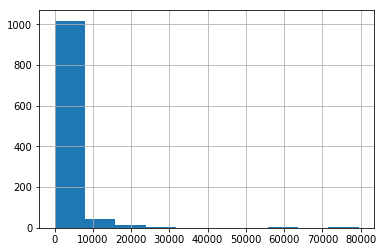

In [83]:
df_merged['retweet_count'].hist()

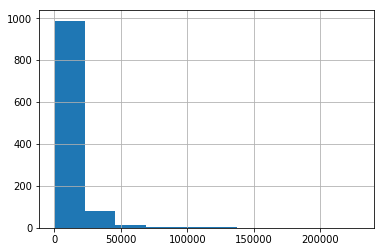

In [84]:
df_merged['favorite_count'].hist()

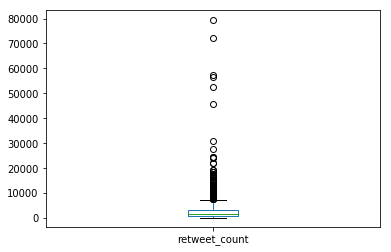

In [85]:
df_merged['retweet_count'].plot('box')

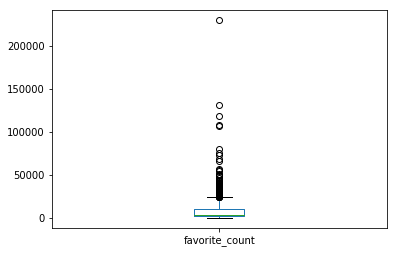

In [86]:
df_merged['favorite_count'].plot('box')

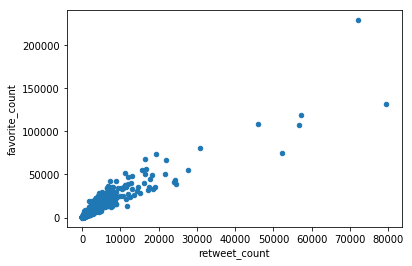

In [87]:
df_merged.plot.scatter('retweet_count','favorite_count' )

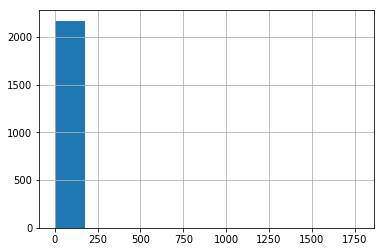

In [88]:
df_merged['rating_numerator'].hist()

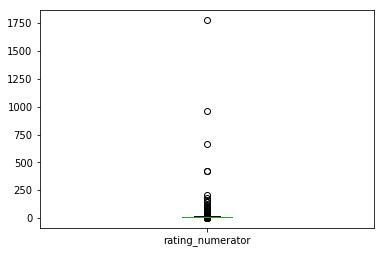

In [89]:

df_merged['rating_numerator'].plot('box')

## Assessment 
### drop these four outliers for better results

#### Define 
use drop function to drop the numerator values higher than 250 to make our analysis better because these are outliers

#### Code

In [90]:
df_merged[df_merged['rating_numerator'] > 250 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,prediction1,prediction1_confident,p1_dog_breed_or_not,prediction2,predction2_confident,p2_dog_breed_or_not,prediction3,prediction3_confident,p3_dog_breed_or_not,stage
162,855862651834028034,8.558615844633518e+17,194351775.0,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaT,420.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,855860136149123072,8.558585356070011e+17,13615722.0,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaT,666.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaT,1776.0,...,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN
1895,670842764863651840,NaN,NaN,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaT,420.0,...,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,NaN


In [93]:
df1_cleaned = df1_cleaned.drop(labels=[162,163,263,804,1895], axis=0)

#### Test

In [94]:
df1_cleaned[df1_cleaned['rating_numerator'] > 250 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,retweet_status


In [96]:
df_merged['stage'].value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: stage, dtype: int64

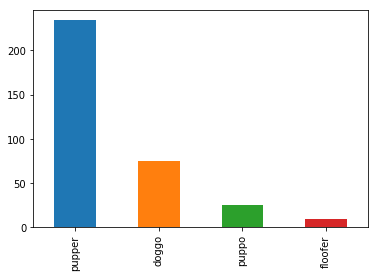

In [98]:
df_merged['stage'].value_counts().plot(kind='bar')

### Visualizations for second dataframe

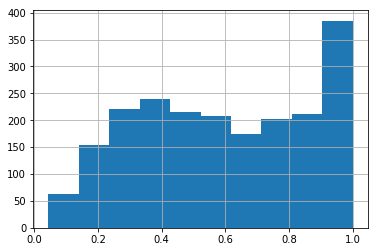

In [99]:
df2_cleaned['prediction1_confident'].hist()

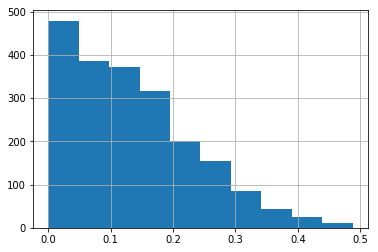

In [100]:
df2_cleaned['predction2_confident'].hist()

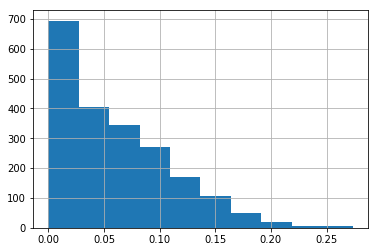

In [101]:
df2_cleaned['prediction3_confident'].hist()

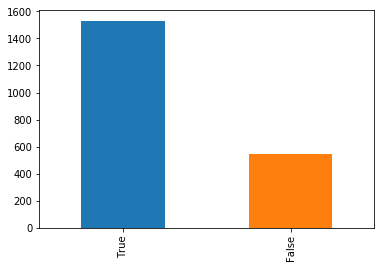

In [102]:
df2_cleaned['p1_dog_breed_or_not'].value_counts().plot(kind='bar')

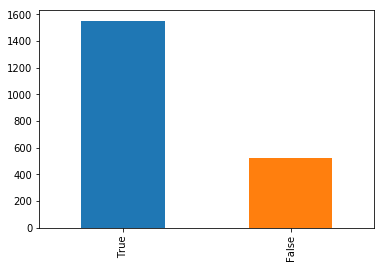

In [103]:
df2_cleaned['p2_dog_breed_or_not'].value_counts().plot(kind='bar')

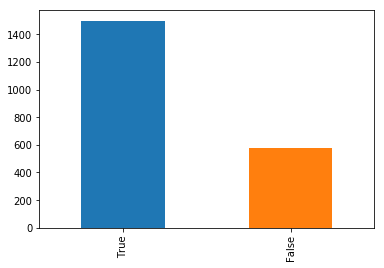

In [104]:
df2_cleaned['p3_dog_breed_or_not'].value_counts().plot(kind='bar')

In [105]:
df2_cleaned['prediction1_confident'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: prediction1_confident, dtype: float64